* ハフ変換のサンプルプログラム
* 実行前に opencv-python をインストールする

In [9]:
# Google colab の場合、下のコメント部分の#を削除し、実験に使う画像をダウンロードする
#!wget https://github.com/opencv/opencv/raw/master/samples/data/sudoku.png

In [ ]:
# Google colab でファイルを自分のPCからファイルをアップローとする場合、下のコメント部分の#を削除する
# from google.colab import files
# uploaded = files.upload()

# 自分で用意したファイルを使う場合は、以下の imread の中のファイル名を変更する

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2 # opencv ライブラリをインポート
print(cv2.__version__) # バージョンを確認

4.5.4


detected line 29


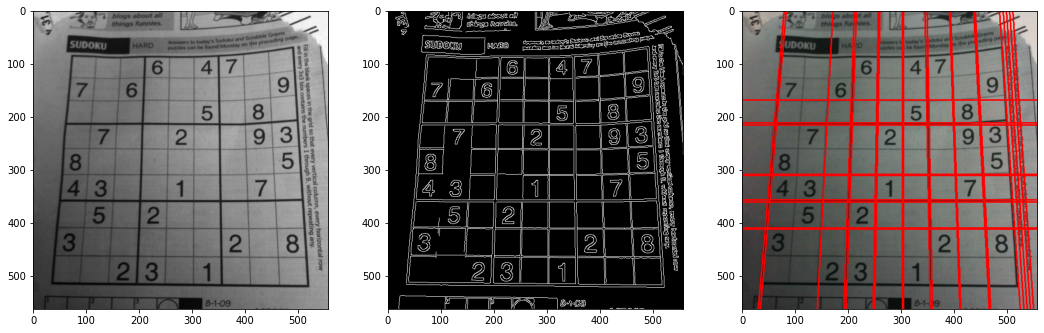

In [5]:
# 実験で使うサンプル画像を変数に読み込み、グレースケールに変換
img_sudoku = cv2.imread('sudoku.png')
img_gray = cv2.cvtColor(img_sudoku, cv2.COLOR_BGR2GRAY)

# Canny変換(エッジ検出)後、ハフ変換を行い、結果を画像に描画
edges = cv2.Canny(img_gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
print('detected line', len(lines))
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_sudoku, (x1, y1), (x2, y2), (255,0,0), 2)

fig, ax = plt.subplots(1, 3, figsize=(18,8))
ax[0].imshow(img_gray, cmap = "gray")
ax[1].imshow(edges, cmap = "gray")
ax[2].imshow(img_sudoku)
plt.show()